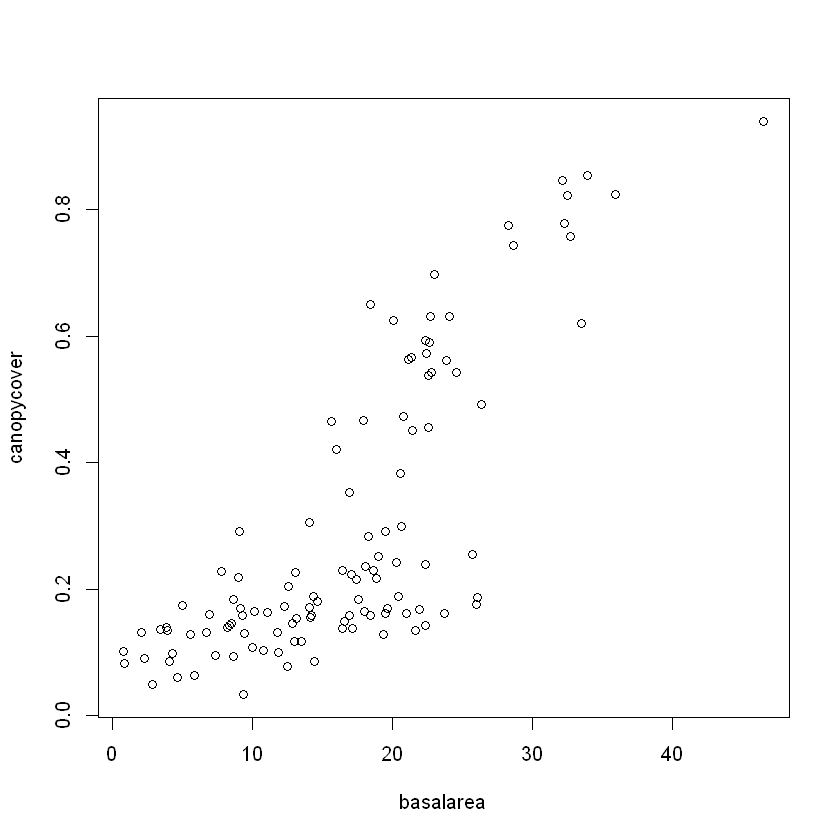

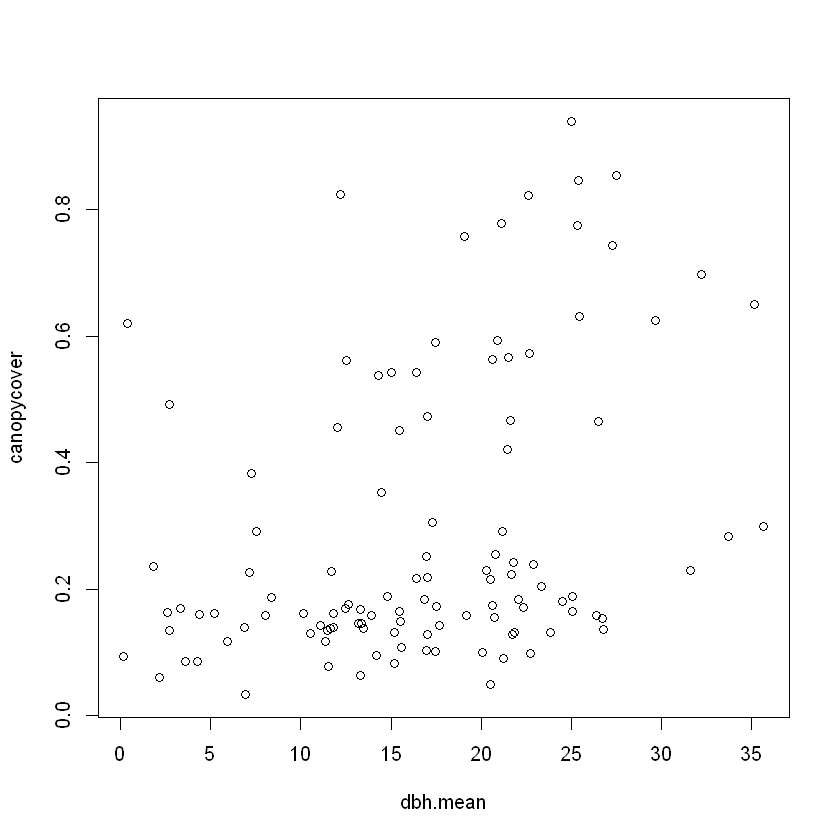

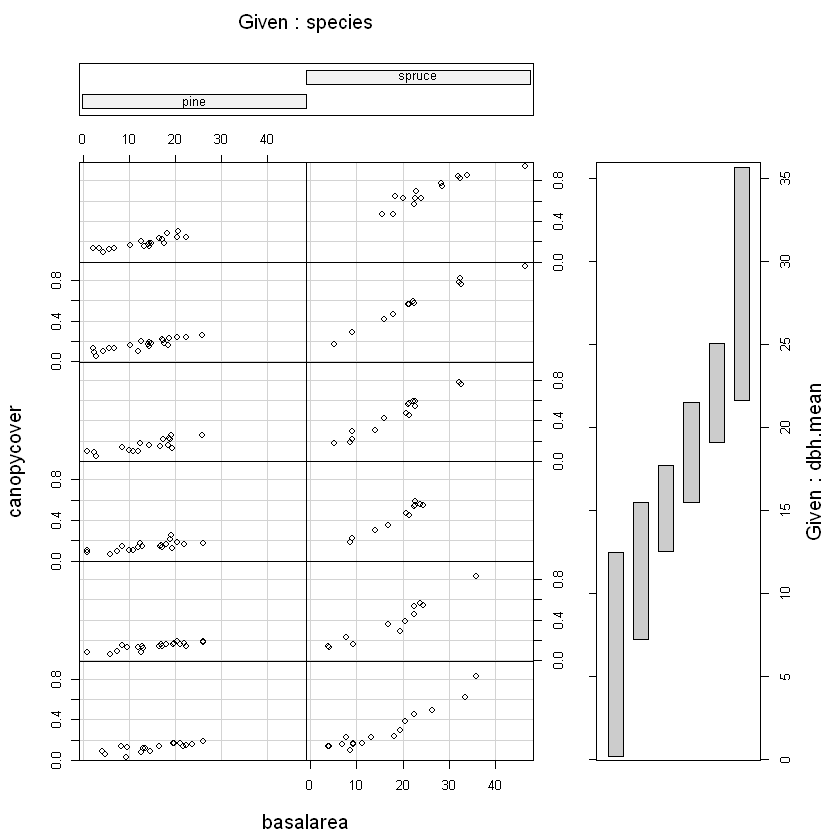

In [1]:
# 1


data<-read.table("canopycover.txt", sep="\t", dec=".", header=TRUE)
attach(data)

plot(basalarea, canopycover)
plot(dbh.mean, canopycover)
coplot(canopycover~basalarea|species*dbh.mean)



Call:
glm(formula = canopycover ~ basalarea + dbh.mean + factor(species), 
    family = gaussian(link = "identity"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.12705  -0.04883  -0.01310   0.04586   0.17978  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.1895763  0.0190874  -9.932  < 2e-16 ***
basalarea              0.0146876  0.0008491  17.299  < 2e-16 ***
dbh.mean               0.0081748  0.0008506   9.610 3.06e-16 ***
factor(species)spruce  0.2359235  0.0143245  16.470  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.004949616)

    Null deviance: 5.77901  on 113  degrees of freedom
Residual deviance: 0.54446  on 110  degrees of freedom
AIC: -275.72

Number of Fisher Scoring iterations: 2



Call:
glm(formula = canopycover ~ basalarea + dbh.mean + factor(species), 
    family = Gamma(link = "log"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.86262  -0.08825  -0.01596   0.10378   0.52871  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.019862   0.052534  -57.48   <2e-16 ***
basalarea              0.045644   0.002337   19.53   <2e-16 ***
dbh.mean               0.026969   0.002341   11.52   <2e-16 ***
factor(species)spruce  0.775492   0.039425   19.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.03749437)

    Null deviance: 61.1643  on 113  degrees of freedom
Residual deviance:  4.6413  on 110  degrees of freedom
AIC: -372.2

Number of Fisher Scoring iterations: 5



Call:
glm(formula = canopycover ~ basalarea + dbh.mean + factor(species), 
    family = inverse.gaussian(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4941  -0.2162  -0.0054   0.2261   1.6754  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.026342   0.058967 -51.323   <2e-16 ***
basalarea              0.045471   0.002935  15.492   <2e-16 ***
dbh.mean               0.028214   0.002831   9.967   <2e-16 ***
factor(species)spruce  0.735474   0.051503  14.280   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.2697212)

    Null deviance: 261.772  on 113  degrees of freedom
Residual deviance:  39.203  on 110  degrees of freedom
AIC: -300.51

Number of Fisher Scoring iterations: 6



Call:
betareg(formula = canopycover ~ basalarea + dbh.mean + factor(species), 
    data = data, link = c("logit"))

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.3572 -0.5500  0.0821  0.7869  2.3357 

Coefficients (mean model with logit link):
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -3.754817   0.078668  -47.73   <2e-16 ***
basalarea              0.084451   0.003229   26.15   <2e-16 ***
dbh.mean               0.043355   0.002931   14.79   <2e-16 ***
factor(species)spruce  1.228457   0.049067   25.04   <2e-16 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   100.03      13.22   7.568 3.78e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:   209 on 5 Df
Pseudo R-squared: 0.9357
Number of iterations: 34 (BFGS) + 3 (Fisher scoring) 

[1] 0.004775945

[1] 0.007594314

[1] 0.007287518

[1] 0.001404962

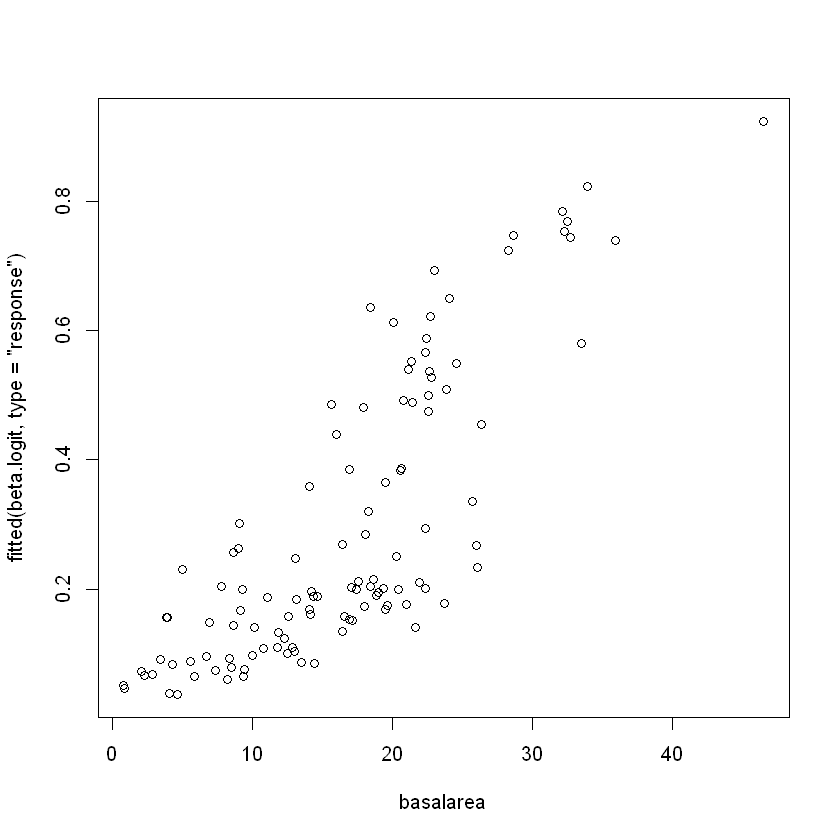

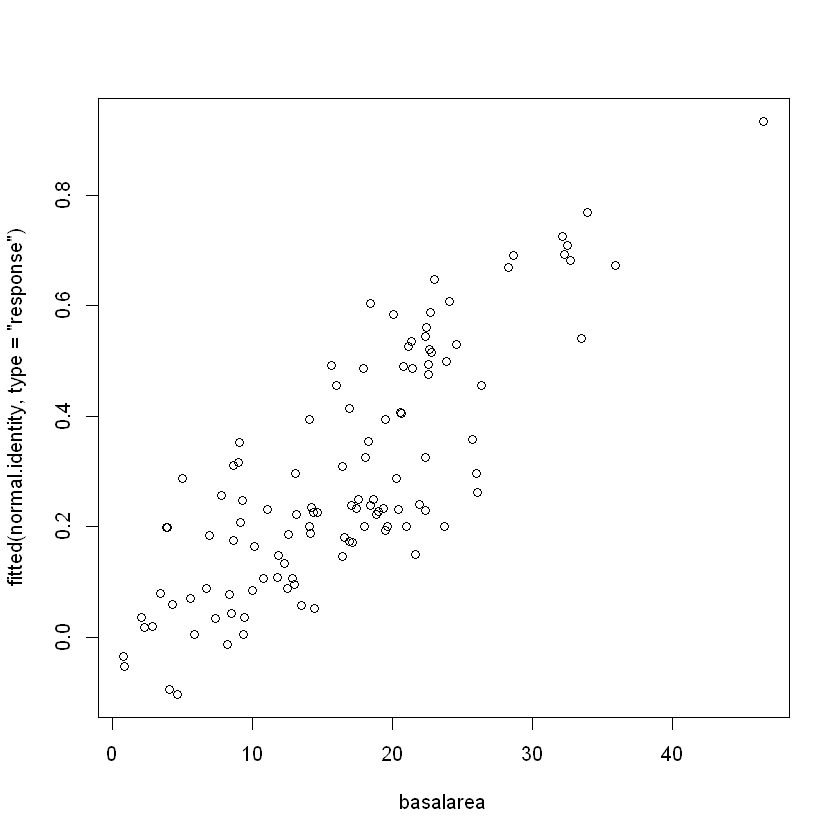

In [7]:
### a)

### i)
normal.identity<-glm(canopycover~basalarea+dbh.mean+factor(species), family=gaussian(link="identity"), data=data)
summary(normal.identity)

### ii)
gamma.log<-glm(canopycover~basalarea+dbh.mean+factor(species), family=Gamma(link="log"), data=data)
summary(gamma.log)

### iii)
inverse.gaussian<-glm(canopycover~basalarea+dbh.mean+factor(species), family=inverse.gaussian(link="log"), data=data)
summary(inverse.gaussian)

### iv)

library(betareg)
beta.logit<-betareg(canopycover~basalarea+dbh.mean+factor(species), data=data, link=c("logit"))
summary(beta.logit)

# MSE values

mean(residuals(normal.identity, type="response")^2)
mean(residuals(gamma.log, type="response")^2)
mean(residuals(inverse.gaussian, type="response")^2)
mean(residuals(beta.logit, type="response")^2)

# > mean(residuals(normal.identity, type="response")^2)
# [1] 0.004775945
# > mean(residuals(gamma.log, type="response")^2)
# [1] 0.007594314
# > mean(residuals(inverse.gaussian, type="response")^2)
# [1] 0.007287518
# > mean(residuals(beta.logit, type="response")^2)
# [1] 0.001404962

# Since the beta model with logit link gives the least MSE,
# it will give the best modeling results

plot(basalarea,fitted(beta.logit, type="response"))

plot(basalarea,fitted(normal.identity, type="response"))

In [8]:
### b)

newdata<-data.frame(basalarea=20, dbh.mean=15, species="pine")
predict(beta.logit, newdata=newdata, type="response")

# Point prediction
# 1 
# 0.1953721

### c)


newdata<-data.frame(basalarea=20, dbh.mean=15, species="pine")
predict(beta.logit, newdata=newdata, type="response") # 0.1953721  = point prediction

eta<-predict(beta.logit, newdata=newdata, type="link") # -1.415474 
xf<-t(t(c(1,20,15,0)))

vcov(beta.logit)
#                         (Intercept)     basalarea      dbh.mean factor(species)spruce         (phi)
# (Intercept)            0.0061885838 -1.496432e-04 -1.399527e-04         -7.582015e-04  -0.119780191
# basalarea             -0.0001496432  1.042804e-05 -1.022172e-06         -4.529760e-05   0.002891729
# dbh.mean              -0.0001399527 -1.022172e-06  8.588110e-06          1.455384e-05   0.001310909
# factor(species)spruce -0.0007582015 -4.529760e-05  1.455384e-05          2.407549e-03   0.036689174
# (phi)                 -0.1197801908  2.891729e-03  1.310909e-03          3.668917e-02 174.690420419

cov.eta<-t(xf)%*%vcov(beta.logit)[-5,-5]%*%xf # 0.001494513

lowerbound<-exp(eta-qnorm(0.975)*sqrt(cov.eta))/(1+exp(eta-qnorm(0.975)*sqrt(cov.eta)))
upperbound<-exp(eta+qnorm(0.975)*sqrt(cov.eta))/(1+exp(eta+qnorm(0.975)*sqrt(cov.eta)))
lowerbound
upperbound
# > lowerbound
# [,1]
# [1,] 0.1837351
# > upperbound
# [,1]
# [1,] 0.2075588

1 
0.1953721

1 
0.1953721

,(Intercept),basalarea,dbh.mean,factor(species)spruce,(phi)
(Intercept),0.0061885838,-1.496432e-04,-1.399527e-04,-7.582015e-04,-0.119780191
basalarea,-0.0001496432,1.042804e-05,-1.022172e-06,-4.529760e-05,0.002891729
dbh.mean,-0.0001399527,-1.022172e-06,8.588110e-06,1.455384e-05,0.001310909
factor(species)spruce,-0.0007582015,-4.529760e-05,1.455384e-05,2.407549e-03,0.036689174
(phi),-0.1197801908,2.891729e-03,1.310909e-03,3.668917e-02,174.690420419


0.1837351


0.2075588


In [11]:
### d)


library(mvtnorm)

eta.f<-predict(beta.logit, newdata=newdata, type="link")
phi.hat<-coef(beta.logit)[5]

xf<-t(t(c(1,20,15,0)))
etarow<-c(t(xf),0)
phirow<-c(rep(0,length(xf)),1)
A<-rbind(etarow,phirow)

cov.etaphi<-A%*%vcov(beta.logit)%*%t(A)
etaphi.star<-rmvnorm(1000, mean = c(eta.f,phi.hat), sigma = cov.etaphi)

muf.star<-exp(etaphi.star[,1])/(1+exp(etaphi.star[,1]))
phi.star<-etaphi.star[,2]
p.star<-muf.star*phi.star
q.star<-phi.star*(1-muf.star)

yf.star<-rbeta(1000, shape1=p.star, shape2=q.star)

lower.bound<-quantile(yf.star, c(0.1))
upper.bound<-quantile(yf.star, 1-c(0.1))
lower.bound
upper.bound

# > lower.bound
# 10% 
# 0.1432464 
# > upper.bound
# 90% 
# 0.2448614

10% 
0.1449454

90% 
0.247979

In [12]:
### e)

model.H0<-betareg(canopycover~basalarea*factor(species), data=data, link=c("logit"))
summary(model.H0)

model.H1<-betareg(canopycover~basalarea*factor(species)+dbh.mean*factor(species), data=data, link=c("logit"))
summary(model.H1)

# same as model.H1
model.H2<-betareg(canopycover ~ basalarea + dbh.mean + factor(species) + basalarea:factor(species) + dbh.mean:factor(species), data=data, link=c("logit"))

library(lmtest)
lrtest(model.H0, model.H1)
lrtest(model.H0, model.H1)$Chisq[2] # value of test statistic = 162.5798
lrtest(model.H0, model.H1)$"Pr(>Chisq)"[2]
#[1] 4.968739e-36

# We reject the null hypothesis. Therefore, X2=dbh.mean is statistically significant


Call:
betareg(formula = canopycover ~ basalarea * factor(species), data = data, 
    link = c("logit"))

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-3.0545 -0.5178  0.0389  0.6897  3.0640 

Coefficients (mean model with logit link):
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.325418   0.126896 -18.325  < 2e-16 ***
basalarea                        0.043435   0.007733   5.617 1.95e-08 ***
factor(species)spruce           -0.021274   0.179212  -0.119    0.906    
basalarea:factor(species)spruce  0.068485   0.009698   7.062 1.65e-12 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   45.941      6.055   7.588 3.26e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:   167 on 5 Df
Pseudo R-squared: 0.8984
Number of iterations: 13 (BFGS) + 4 (Fisher sc


Call:
betareg(formula = canopycover ~ basalarea * factor(species) + dbh.mean * 
    factor(species), data = data, link = c("logit"))

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-4.0748 -0.5448  0.0334  0.6806  2.3852 

Coefficients (mean model with logit link):
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -3.020286   0.092603 -32.615   <2e-16 ***
basalarea                        0.048590   0.003996  12.160   <2e-16 ***
factor(species)spruce            0.143666   0.118403   1.213   0.2250    
dbh.mean                         0.033972   0.003399   9.995   <2e-16 ***
basalarea:factor(species)spruce  0.051736   0.004998  10.351   <2e-16 ***
factor(species)spruce:dbh.mean   0.010859   0.004402   2.467   0.0136 *  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   193.09      25.55   7.559 4.07e-14 ***
---
Signif. codes:  0 '***' 0.001 '*

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,166.9923,NA,NA,NA
2,7,248.2822,2,162.5798,4.968739e-36


[1] 162.5798

[1] 4.968739e-36

The following objects are masked from data (pos = 3):

    Nitrogen, Yield


The following objects are masked from data (pos = 4):

    Nitrogen, Yield


The following objects are masked from data (pos = 5):

    Nitrogen, Yield





Call:
lm(formula = Yield ~ Nitrogen + I(Nitrogen^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9627  -4.4692  -0.1185   4.2774  12.2581 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   24.9489094  2.5795956   9.672 1.26e-13 ***
Nitrogen       0.7864627  0.0565745  13.901  < 2e-16 ***
I(Nitrogen^2) -0.0022237  0.0002617  -8.498 1.03e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.006 on 57 degrees of freedom
Multiple R-squared:  0.9178,	Adjusted R-squared:  0.915 
F-statistic: 318.4 on 2 and 57 DF,  p-value: < 2.2e-16


I(Nitrogen^2) 
 -0.002223739


Call:
glm(formula = Yield ~ log(Nitrogen), family = gaussian(link = "log"), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-18.3369   -5.1454    0.6327    4.6299   13.4948  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.65173    0.09458   28.04   <2e-16 ***
log(Nitrogen)  0.37030    0.01976   18.74   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 44.04159)

    Null deviance: 25022.3  on 59  degrees of freedom
Residual deviance:  2554.4  on 58  degrees of freedom
AIC: 401.35

Number of Fisher Scoring iterations: 4


1 
90.66521


Formula: Yield ~ SSasymp(Nitrogen, Asym, R0, lrc)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
Asym 102.0634     3.5015   29.15  < 2e-16 ***
R0    19.8704     3.8214    5.20 2.81e-06 ***
lrc   -4.3018     0.1363  -31.57  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.12 on 57 degrees of freedom

Number of iterations to convergence: 0 
Achieved convergence tolerance: 1.915e-07


Asym 
102.0634


Formula: Yield ~ SSmicmen(Nitrogen, Vm, K)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
Vm  116.861      3.502   33.37  < 2e-16 ***
K    43.525      4.319   10.08 2.32e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.567 on 58 degrees of freedom

Number of iterations to convergence: 0 
Achieved convergence tolerance: 6.969e-07


[1] 90.57802
attr(,"gradient")
            Vm          K
[1,] 0.7750935 -0.4680429

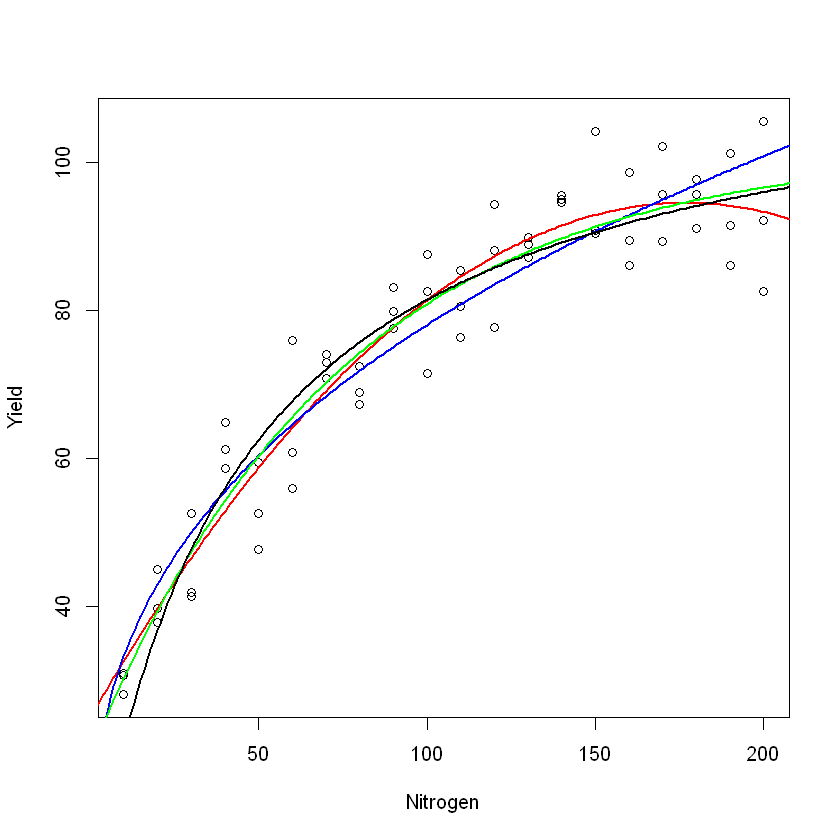

In [19]:
### 2)
data<-read.table("NitrogenYield.txt", sep="\t", dec=".", header=TRUE)
attach(data)

plot(data)
newdata<-data.frame(Nitrogen=0:210)

### a)

model.poly<-lm(Yield~Nitrogen+I(Nitrogen^2))
summary(model.poly)
lines(newdata$Nitrogen, predict(model.poly, newdata=newdata), col="red", lwd=2)

coef(model.poly)[3] # beta2 parameter
# I(Nitrogen^2) 
# -0.002223739

### b)
model.exp<-glm(Yield~log(Nitrogen), family=gaussian(link="log"), data=data) # linearized
summary(model.exp)
lines(newdata$Nitrogen, predict(model.exp, newdata=newdata, type="response"), col="blue", lwd=2)

# maximum likelihood estimate for the expected value for mu
predict(model.exp, newdata=data.frame(Nitrogen=150), type="response") # 90.66521

### c)

model.asymp<-nls(Yield~SSasymp(Nitrogen, Asym,R0,lrc), data=data)
summary(model.asymp)
lines(newdata$Nitrogen, predict(model.asymp, newdata=newdata, type="response"), col="green", lwd=2)

coef(model.asymp)[1] # beta0
# Asym 
# 102.0634

### d)

model.mm<-nls(Yield~SSmicmen(Nitrogen, Vm, K), data=data)
summary(model.mm)
lines(newdata$Nitrogen, predict(model.mm, newdata=newdata, type="response"), col="black", lwd=2)

# maximum likelihood estimate for the expected value for mu
predict(model.mm, newdata=data.frame(Nitrogen=150), type="response") # [1] 90.57802

In [20]:
### e)

#beta<-lapply(model.asymp, coef)
beta<-coef(model.asymp)
cov.beta<-vcov(model.asymp)


library(mvtnorm)
beta.star<-rmvnorm(1000, mean = beta, sigma = cov.beta)
newdata<-data.frame(Nitrogen=150)

Asym<-beta.star[,1]
R0<-beta.star[,2]
lrc<-beta.star[,3]

mu.star<-Asym+(R0-Asym)*exp(-exp(lrc)*newdata$Nitrogen)


sigma2<-sigma(model.asymp)^2
yf.star<-rnorm(1000, mean=mu.star, sd=sqrt(sigma2))

# 80% prediction interval
pred.lowerbound<-quantile(yf.star, c(0.1))
pred.upperbound<-quantile(yf.star, c(0.9))
pred.lowerbound
pred.upperbound

# > pred.lowerbound
# 10% 
# 83.79363 
# > pred.upperbound
# 90% 
# 99.15466 

10% 
82.82505

90% 
98.40728

In [22]:
### 3

data<-read.table("caffeine.txt", sep="\t", header=TRUE, dec=".")
head(data)
attach(data)

aggregate(Caffeine~factor(Brand)+factor(Formulation), FUN=mean)
aggregate(Caffeine~factor(Brand)+factor(Formulation), FUN=var)

# > aggregate(Caffeine~factor(Brand)+factor(Formulation), FUN=mean)
# factor(Brand) factor(Formulation) Caffeine
# 1          Coke                Diet 46.36020
# 2         Pepsi                Diet 37.21400
# 3          Coke               Sugar 37.94020
# 4         Pepsi               Sugar 37.40014
# > aggregate(Caffeine~factor(Brand)+factor(Formulation), FUN=var)
# factor(Brand) factor(Formulation)  Caffeine
# 1          Coke                Diet  7.442969
# 2         Pepsi                Diet 26.752546
# 3          Coke               Sugar 27.496986
# 4         Pepsi               Sugar  8.337903

,Brand,Formulation,Caffeine
,<chr>,<chr>,<dbl>
1,Coke,Sugar,47.32
2,Coke,Sugar,43.78
3,Coke,Sugar,48.12
4,Coke,Sugar,43.25
5,Coke,Sugar,46.42
6,Coke,Sugar,45.16


The following objects are masked from data (pos = 3):

    Brand, Caffeine, Formulation




factor(Brand),factor(Formulation),Caffeine
<fct>,<fct>,<dbl>
Coke,Diet,46.36020
Pepsi,Diet,37.21400
Coke,Sugar,37.94020
Pepsi,Sugar,37.40014


factor(Brand),factor(Formulation),Caffeine
<fct>,<fct>,<dbl>
Coke,Diet,7.442969
Pepsi,Diet,26.752546
Coke,Sugar,27.496986
Pepsi,Sugar,8.337903



Call:
glm(formula = Caffeine ~ factor(Brand) + factor(Formulation), 
    family = gaussian(link = "inverse"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11.6815   -3.3076    0.2999    3.2758   13.6741  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.0224194  0.0002955  75.877  < 2e-16 ***
factor(Brand)Pepsi       0.0033101  0.0003774   8.771 3.53e-16 ***
factor(Formulation)Sugar 0.0025111  0.0003832   6.553 3.49e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 21.06111)

    Null deviance: 7275.2  on 239  degrees of freedom
Residual deviance: 4991.5  on 237  degrees of freedom
AIC: 1417.5

Number of Fisher Scoring iterations: 5


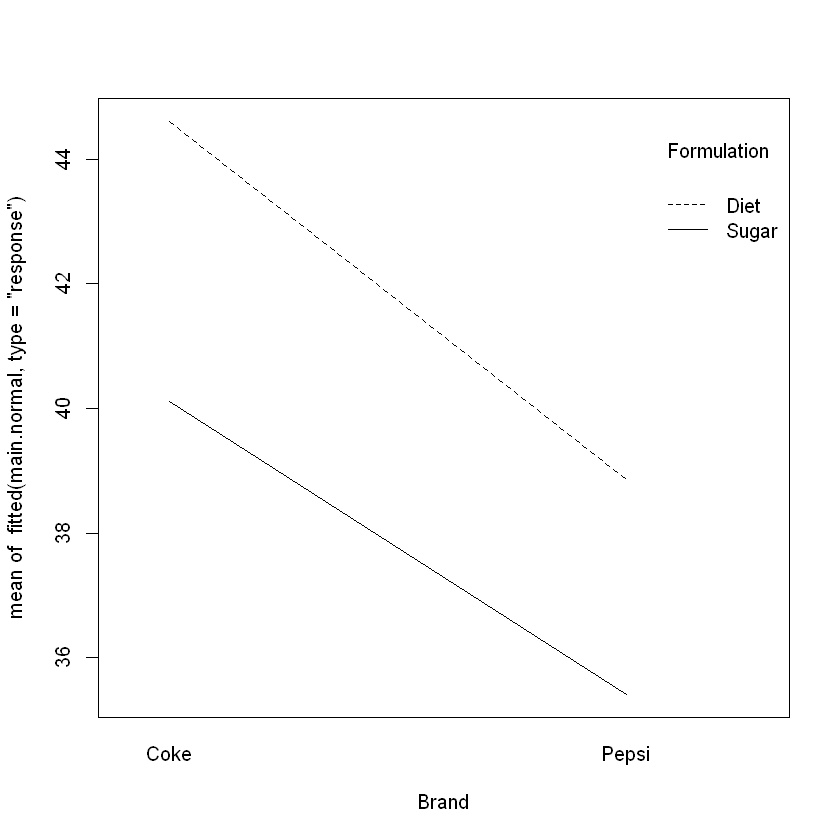

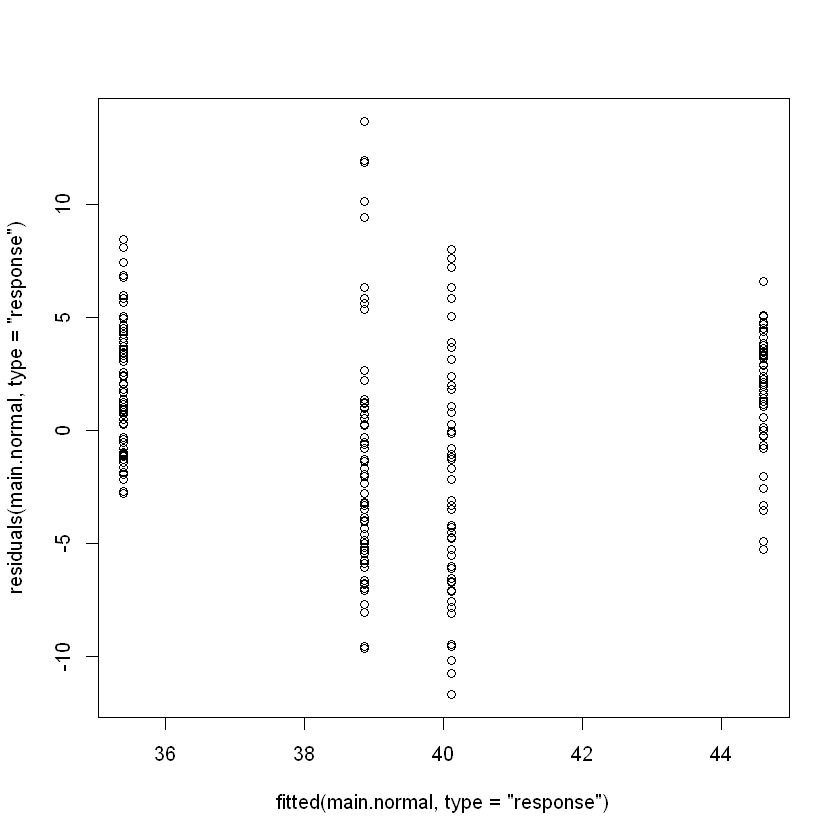

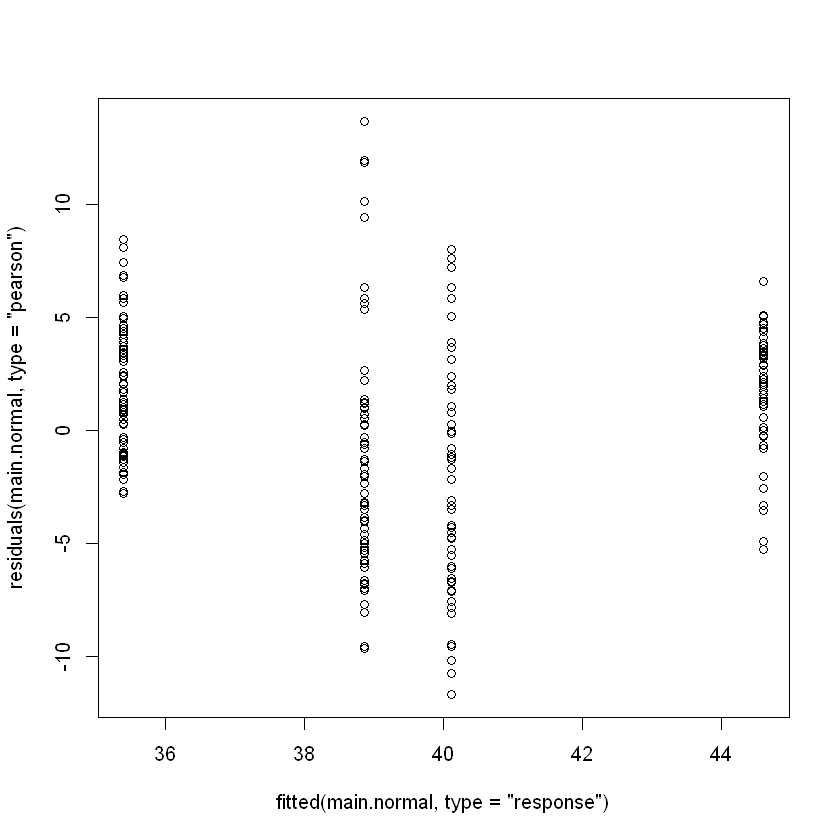


Call:
glm(formula = Caffeine ~ factor(Brand) + factor(Formulation), 
    family = Gamma(link = "inverse"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.32763  -0.08515   0.00881   0.08123   0.31837  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.0226781  0.0003279  69.159  < 2e-16 ***
factor(Brand)Pepsi       0.0030741  0.0003838   8.010 5.15e-14 ***
factor(Formulation)Sugar 0.0021945  0.0003848   5.703 3.49e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.0137118)

    Null deviance: 4.6398  on 239  degrees of freedom
Residual deviance: 3.3182  on 237  degrees of freedom
AIC: 1420

Number of Fisher Scoring iterations: 4


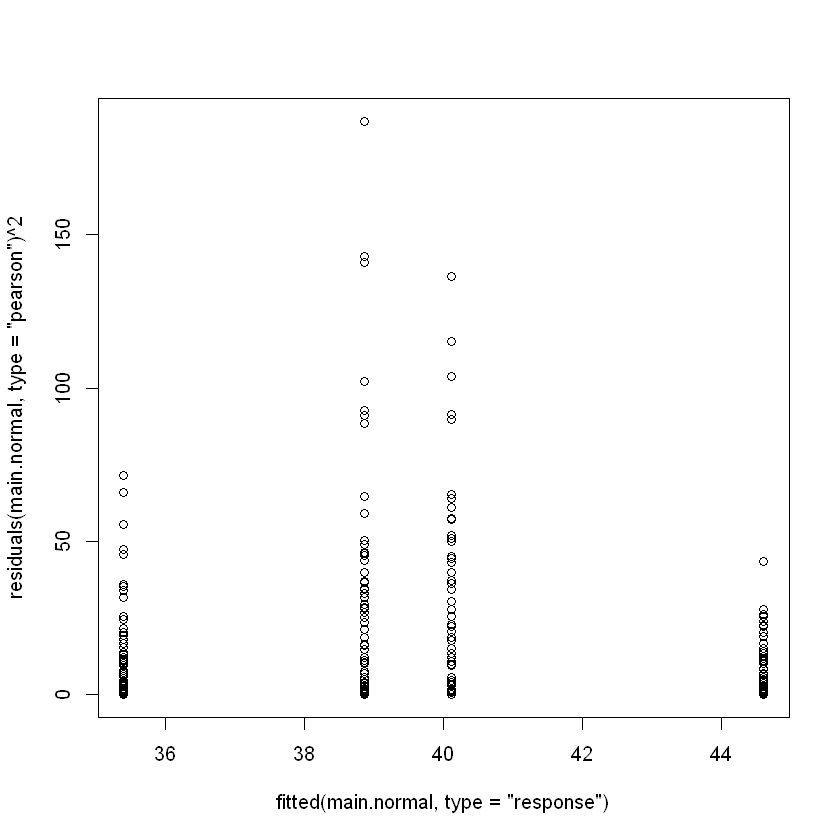

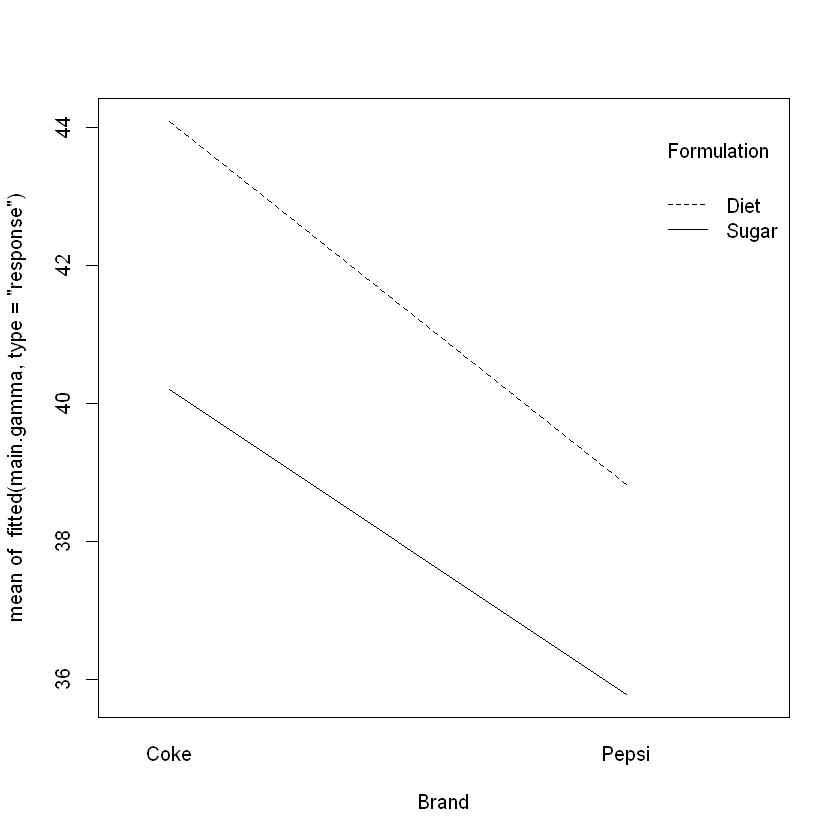

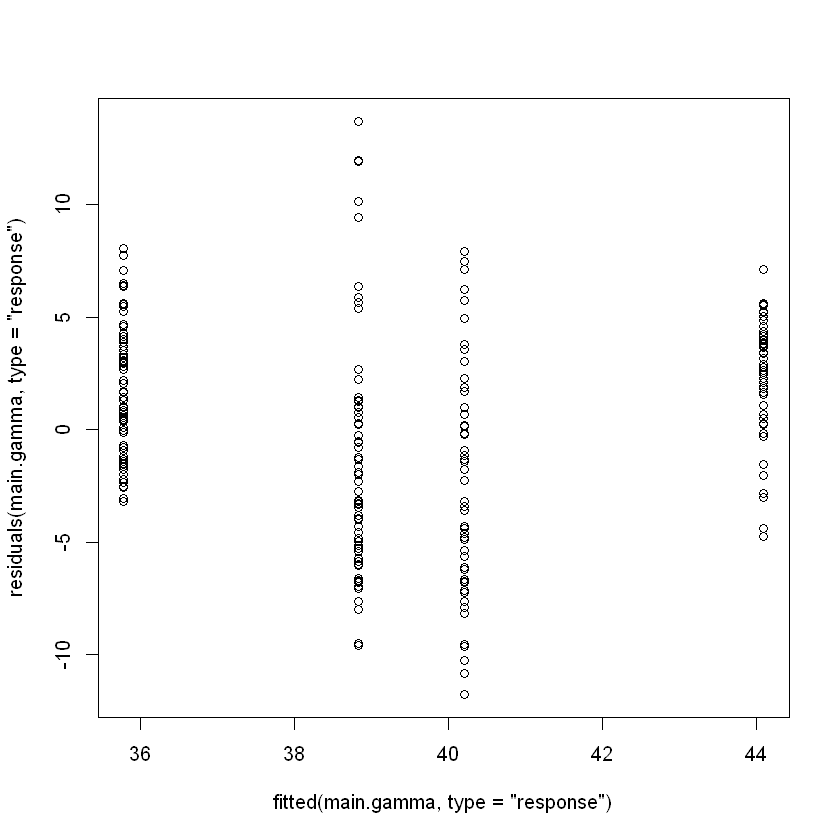

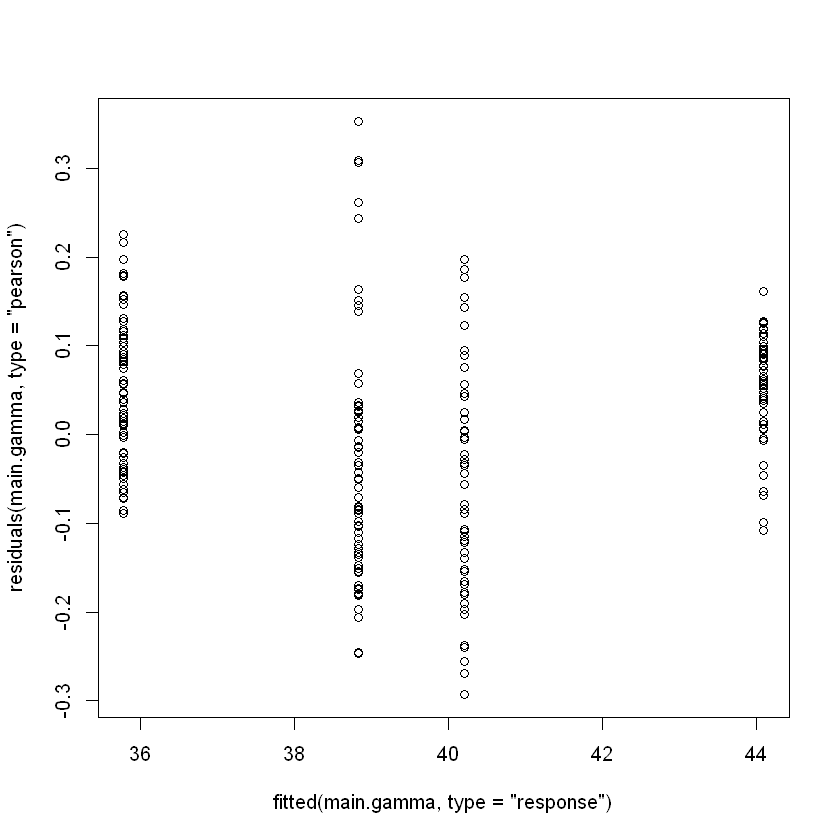


Call:
glm(formula = Caffeine ~ factor(Brand) + factor(Formulation), 
    family = inverse.gaussian(link = "inverse"), data = data)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.055032  -0.013728   0.001348   0.012890   0.048877  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.0228013  0.0003426  66.559  < 2e-16 ***
factor(Brand)Pepsi       0.0029749  0.0003876   7.674 4.32e-13 ***
factor(Formulation)Sugar 0.0020517  0.0003857   5.320 2.40e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.0003502722)

    Null deviance: 0.118349  on 239  degrees of freedom
Residual deviance: 0.086335  on 237  degrees of freedom
AIC: 1422.6

Number of Fisher Scoring iterations: 2


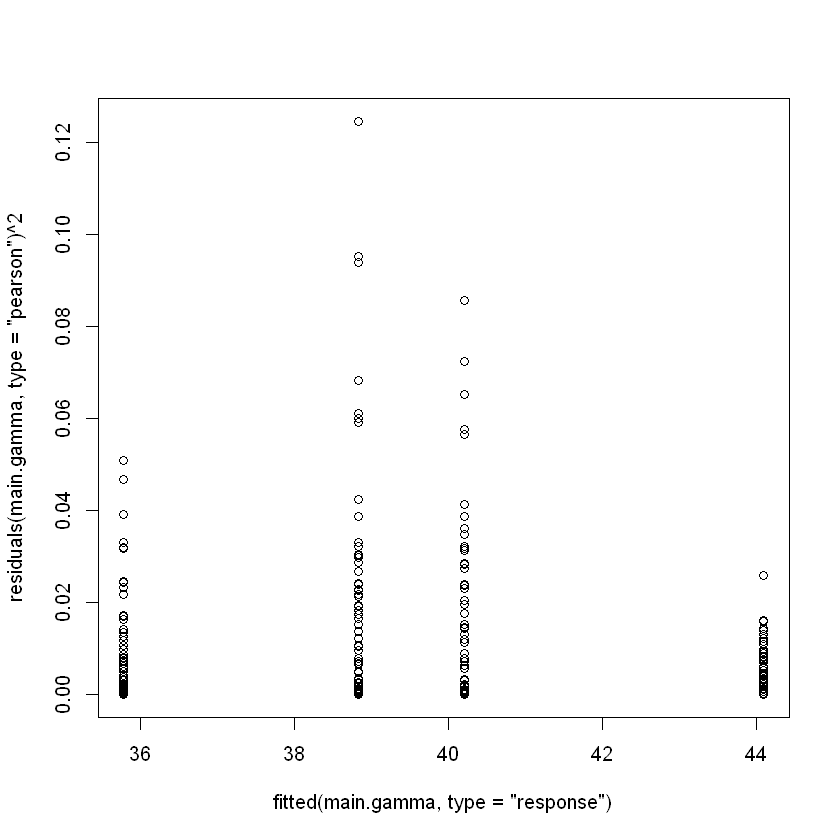

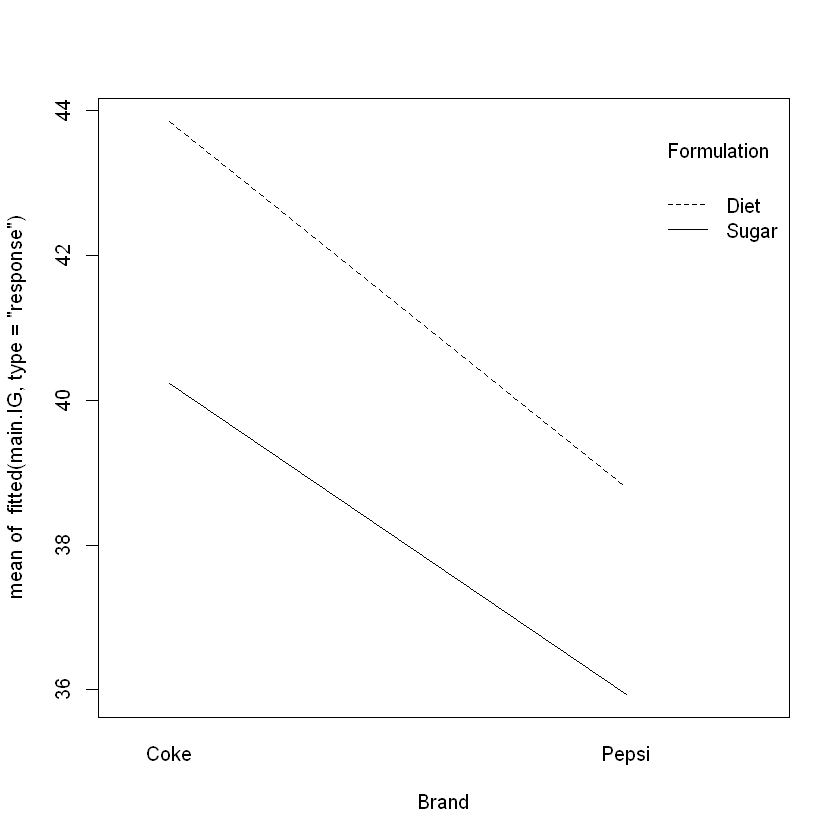

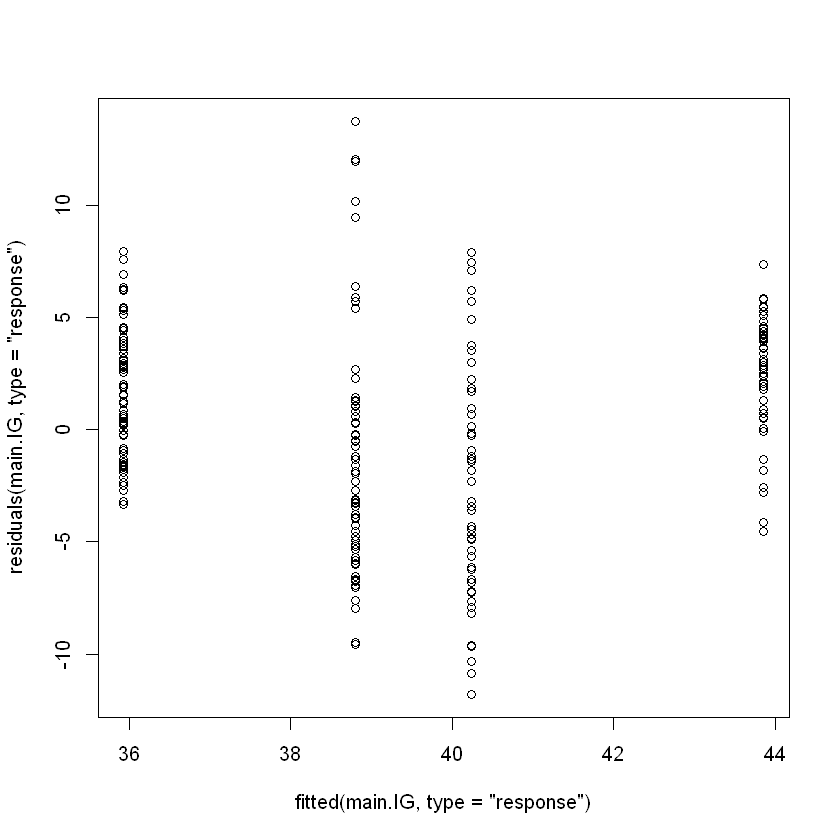

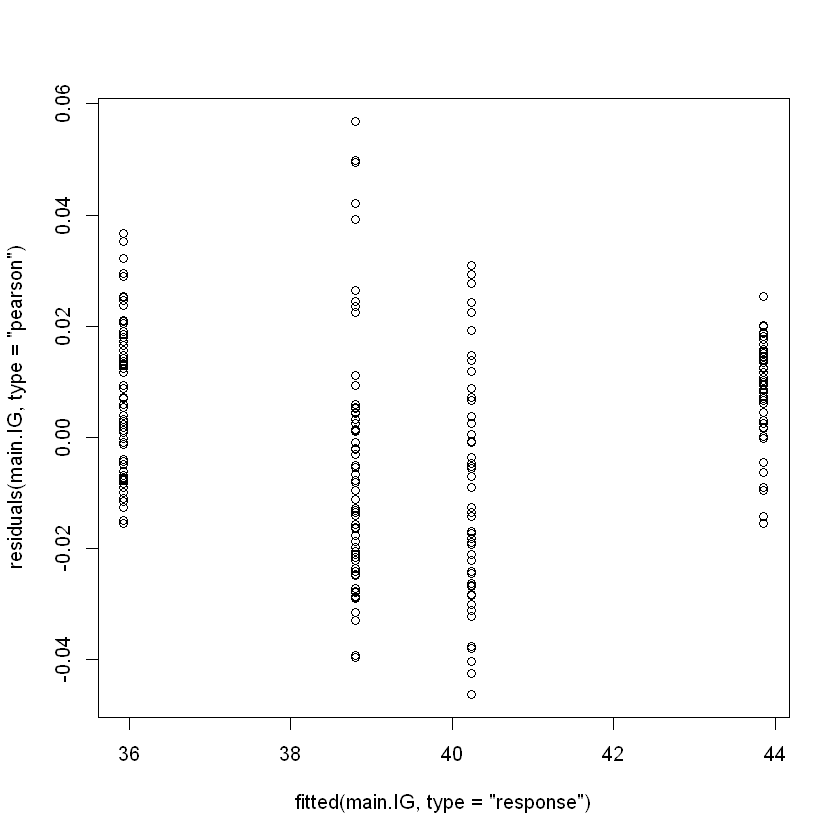


	Shapiro-Wilk normality test

data:  residuals(main.normal, type = "pearson")
W = 0.99255, p-value = 0.2687



	Shapiro-Wilk normality test

data:  residuals(main.gamma, type = "pearson")
W = 0.99346, p-value = 0.3766



	Shapiro-Wilk normality test

data:  residuals(main.IG, type = "pearson")
W = 0.99345, p-value = 0.376


[1] 20.88572

[1] 20.98142


Call:
glm(formula = Caffeine ~ factor(Brand) + factor(Formulation), 
    family = Gamma(link = "identity"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.33399  -0.08808   0.00912   0.08459   0.31654  

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               43.4253     0.5927  73.267  < 2e-16 ***
factor(Brand)Pepsi        -4.5295     0.6235  -7.265 5.36e-12 ***
factor(Formulation)Sugar  -2.9334     0.6010  -4.881 1.94e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.01413432)

    Null deviance: 4.6398  on 239  degrees of freedom
Residual deviance: 3.4315  on 237  degrees of freedom
AIC: 1428.1

Number of Fisher Scoring iterations: 5



Call:
glm(formula = Caffeine ~ factor(Brand) + factor(Formulation), 
    family = Gamma(link = "log"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.33098  -0.08635   0.00940   0.08303   0.31710  

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.77831    0.01405 268.988  < 2e-16 ***
factor(Brand)Pepsi       -0.11793    0.01545  -7.632 5.62e-13 ***
factor(Formulation)Sugar -0.08057    0.01524  -5.289 2.80e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.0139271)

    Null deviance: 4.6398  on 239  degrees of freedom
Residual deviance: 3.3770  on 237  degrees of freedom
AIC: 1424.2

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Caffeine ~ factor(Brand) + factor(Formulation), 
    family = Gamma(link = "inverse"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.32763  -0.08515   0.00881   0.08123   0.31837  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.0226781  0.0003279  69.159  < 2e-16 ***
factor(Brand)Pepsi       0.0030741  0.0003838   8.010 5.15e-14 ***
factor(Formulation)Sugar 0.0021945  0.0003848   5.703 3.49e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.0137118)

    Null deviance: 4.6398  on 239  degrees of freedom
Residual deviance: 3.3182  on 237  degrees of freedom
AIC: 1420

Number of Fisher Scoring iterations: 4


[1] 1428.085

[1] 1424.228

[1] 1420.002

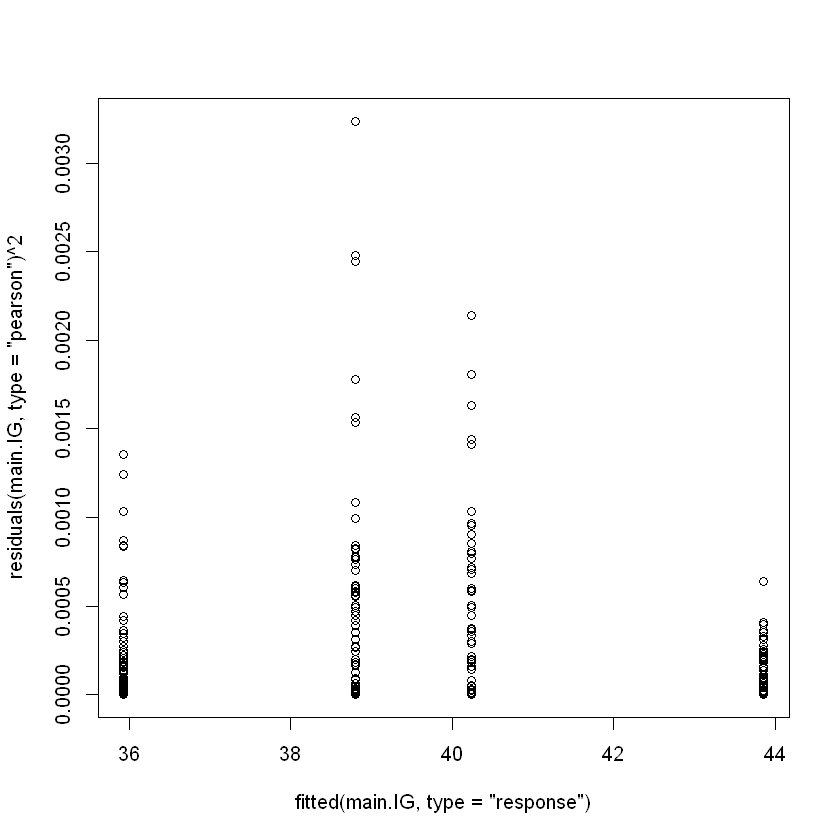

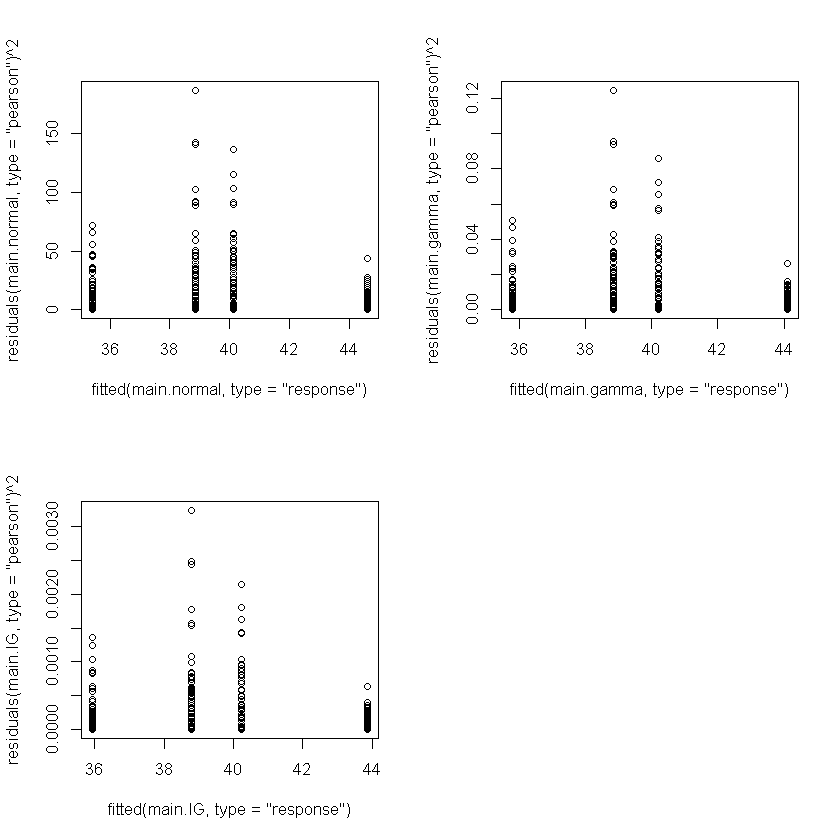

In [24]:
### a)
# The dataset has 2 categorical explanatory variables and a numeric response variable. Also, it can be 
# seen that the response varaible, Caffein can only be a positive value. As a result of these observations,
# the following distribution assumptions were made for the response variable in addition that it is assumed 
# to be a random variable.

# Here the response variable is assumed to follow the normal distribution
main.normal<-glm(Caffeine~factor(Brand)+factor(Formulation), family=gaussian(link="inverse"), data=data)
summary(main.normal)
interaction.plot(Brand, Formulation, fitted(main.normal, type="response"))
plot(fitted(main.normal, type="response"), residuals(main.normal, type="response"))
plot(fitted(main.normal, type="response"), residuals(main.normal, type="pearson"))
plot(fitted(main.normal, type="response"), residuals(main.normal, type="pearson")^2)

# Here the response variable is assumed to follow the gamma distribution
main.gamma<-glm(Caffeine~factor(Brand)+factor(Formulation), family=Gamma(link="inverse"), data=data)
summary(main.gamma)
interaction.plot(Brand, Formulation, fitted(main.gamma, type="response"))
plot(fitted(main.gamma, type="response"), residuals(main.gamma, type="response"))
plot(fitted(main.gamma, type="response"), residuals(main.gamma, type="pearson"))
plot(fitted(main.gamma, type="response"), residuals(main.gamma, type="pearson")^2)

# Here the response variable is assumed to follow the inverse Gaussian distribution
main.IG<-glm(Caffeine~factor(Brand)+factor(Formulation), family=inverse.gaussian(link="inverse"), data=data)
summary(main.IG)
interaction.plot(Brand, Formulation, fitted(main.IG, type="response"))
plot(fitted(main.IG, type="response"), residuals(main.IG, type="response"))
plot(fitted(main.IG, type="response"), residuals(main.IG, type="pearson"))
plot(fitted(main.IG, type="response"), residuals(main.IG, type="pearson")^2)

# This is to test that whether the response variable follows the normal distribution.
# The below test results show that the response variable follows the normal distribution.
shapiro.test(residuals(main.normal, type="pearson"))
shapiro.test(residuals(main.gamma, type="pearson"))
shapiro.test(residuals(main.IG, type="pearson"))

# > shapiro.test(residuals(main.normal, type="pearson"))
# 
# Shapiro-Wilk normality test
# 
# data:  residuals(main.normal, type = "pearson")
# W = 0.99255, p-value = 0.2687
# 
# > shapiro.test(residuals(main.gamma, type="pearson"))
# 
# Shapiro-Wilk normality test
# 
# data:  residuals(main.gamma, type = "pearson")
# W = 0.99346, p-value = 0.3766
# 
# > shapiro.test(residuals(main.IG, type="pearson"))
# 
# Shapiro-Wilk normality test
# 
# data:  residuals(main.IG, type = "pearson")
# W = 0.99345, p-value = 0.376

# Test for the most suitable models using MSE
# The test results show that the MSE values for main.normal and main.gamma models are almost the same.
# But bcause the response variable can only be positive and gamma models are especially suitable for this
# kind of response variable, the gamma model is chosen 
#MSE.normal
MSE.gamma<-mean(residuals(main.gamma, type="response")^2)
MSE.gamma
MSE.IG<-mean(residuals(main.IG, type="response")^2)
MSE.IG

# > MSE.normal
# [1] 20.79773
# > MSE.gamma<-mean(residuals(main.gamma, type="response")^2)
# > MSE.gamma
# [1] 20.88572
# > MSE.IG<-mean(residuals(main.IG, type="response")^2)
# > MSE.IG
# [1] 20.98142

# It's really difficult to choose the best model based on this
par(mfrow = c(2, 2))
plot(fitted(main.normal, type="response"), residuals(main.normal, type="pearson")^2)
plot(fitted(main.gamma, type="response"), residuals(main.gamma, type="pearson")^2)  
plot(fitted(main.IG, type="response"), residuals(main.IG, type="pearson")^2)

# Here we define different link functions for the gamma model
main.gammaIdentity<-glm(Caffeine~factor(Brand)+factor(Formulation), family=Gamma(link="identity"), data=data)
summary(main.gammaIdentity)

main.gammaLog<-glm(Caffeine~factor(Brand)+factor(Formulation), family=Gamma(link="log"), data=data)
summary(main.gammaLog)

main.gammaInverse<-glm(Caffeine~factor(Brand)+factor(Formulation), family=Gamma(link="inverse"), data=data)
summary(main.gammaInverse)

# Based on the AIC values, the main.gammaInverse model is best model
AIC(main.gammaIdentity)
AIC(main.gammaLog)
AIC(main.gammaInverse)

# > AIC(main.gammaIdentity)
# [1] 1428.085
# > AIC(main.gammaLog)
# [1] 1424.228
# > AIC(main.gammaInverse)
# [1] 1420.002


In [25]:
### b)

# y1f

#main.gammaLog<-glm(time~poison+treat, family=Gamma(link="log"), data=rats)
#summary(main.gammaLog)

newdata<-data.frame(Brand="Coke",Formulation="Diet")
pred<-predict(main.gammaInverse, newdata=newdata, type="response")
# point prediction
# > pred
# 1 
# 44.09545

eta.hat<-predict(main.gammaInverse, newdata=newdata, type="link")
coef(main.gammaInverse)
xf<-t(cbind(1,0,0))
cov.eta<-as.numeric(t(xf)%*%vcov(main.gammaInverse)%*%xf)
eta.star<-rnorm(1000, mean=eta.hat, sd=sqrt(cov.eta))
mu.star<-exp(eta.star)
var.star<-summary(main.gammaInverse)$dispersion*mu.star^2
a.star<-(mu.star^2)/var.star
s.star<-var.star/mu.star

y1f.star<-rgamma(1000, shape=a.star,scale=s.star)

# y2f

newdata<-data.frame(Brand="Pepsi",Formulation="Diet")
pred<-predict(main.gammaInverse, newdata=newdata, type="response")
# point prediction
# > pred
# 1 
# 38.83168

eta.hat<-predict(main.gammaInverse, newdata=newdata, type="link")
coef(main.gammaInverse)
xf<-t(cbind(1,1,0))
cov.eta<-as.numeric(t(xf)%*%vcov(main.gammaInverse)%*%xf)
eta.star<-rnorm(1000, mean=eta.hat, sd=sqrt(cov.eta))
mu.star<-exp(eta.star)
var.star<-summary(main.gammaInverse)$dispersion*mu.star^2
a.star<-(mu.star^2)/var.star
s.star<-var.star/mu.star

y2f.star<-rgamma(1000, shape=a.star,scale=s.star)

diff.star<-y2f.star-y1f.star

# 80% prediction interval
lower.bound<-quantile(diff.star, c(0.1))
upper.bound<-quantile(diff.star, 1-c(0.1))
lower.bound
upper.bound

# > lower.bound
# 10% 
# -0.214814 
# > upper.bound
# 90% 
# 0.2147838  

(Intercept)       factor(Brand)Pepsi factor(Formulation)Sugar 
             0.022678077              0.003074092              0.002194481

(Intercept)       factor(Brand)Pepsi factor(Formulation)Sugar 
             0.022678077              0.003074092              0.002194481

10% 
-0.211147

90% 
0.2256812

In [26]:
### c)

model.H0<-glm(Caffeine~factor(Formulation), family=Gamma(link="inverse"), data=data)
summary(model.H0)

model.H1<-glm(Caffeine~factor(Brand)+factor(Formulation), family=Gamma(link="inverse"), data=data)
summary(model.H1)

anova(model.H0, model.H1, test = "F")
anova(model.H0, model.H1, test="F")$"F"[2] # the value of the test statistic = 63.6521
anova(model.H0, model.H1, test="F")$"Pr(>F)"[2] # 6.335457e-14

# We reject the null hypothesis since the p-value is less than 5%.
# Therefore, the explanatory variable X1(Brand) is significant in the model.


Call:
glm(formula = Caffeine ~ factor(Formulation), family = Gamma(link = "inverse"), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.32056  -0.09942  -0.01746   0.10096   0.25803  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.0243754  0.0002930   83.19  < 2e-16 ***
factor(Formulation)Sugar 0.0022025  0.0004335    5.08 7.61e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.01734165)

    Null deviance: 4.6398  on 239  degrees of freedom
Residual deviance: 4.1909  on 238  degrees of freedom
AIC: 1474.2

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Caffeine ~ factor(Brand) + factor(Formulation), 
    family = Gamma(link = "inverse"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.32763  -0.08515   0.00881   0.08123   0.31837  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.0226781  0.0003279  69.159  < 2e-16 ***
factor(Brand)Pepsi       0.0030741  0.0003838   8.010 5.15e-14 ***
factor(Formulation)Sugar 0.0021945  0.0003848   5.703 3.49e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.0137118)

    Null deviance: 4.6398  on 239  degrees of freedom
Residual deviance: 3.3182  on 237  degrees of freedom
AIC: 1420

Number of Fisher Scoring iterations: 4


,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,238,4.190944,NA,NA,NA,NA
2,237,3.318159,1,0.8727847,63.6521,6.335457e-14


[1] 63.6521

[1] 6.335457e-14